In [69]:
dataset = [
    (2, 10),
    (2, 6),
    (11, 11),
    (6, 9),
    (6, 4),
    (1, 2),
    (5, 10),
    (4, 9),
    (10, 12),
    (7, 5),
    (9, 11),
    (4, 6),
    (3, 10),
    (3, 8),
    (6, 11),
]

# label them
# 0 = A1

labelled_dataset = []

for i in range(len(dataset)):
    labelled_dataset.append(("A" + str(i+1), [dataset[i][0], dataset[i][1]]))

labelled_dataset

#convert to 2d numpy array
import numpy as np

dataset = np.array(dataset)
dataset

array([[ 2, 10],
       [ 2,  6],
       [11, 11],
       [ 6,  9],
       [ 6,  4],
       [ 1,  2],
       [ 5, 10],
       [ 4,  9],
       [10, 12],
       [ 7,  5],
       [ 9, 11],
       [ 4,  6],
       [ 3, 10],
       [ 3,  8],
       [ 6, 11]])

## K - Means Clustering

K = 2

In [70]:
#k mean
import numpy as np

# 1. randomly select k points as centroids
# 2. assign each point to the closest centroid
# 3. recompute the centroids of newly formed clusters
# 4. repeat steps 2 and 3 until the centroids don't change

# 1. randomly select k points as centroids
k = 2
centroids = dataset[np.random.randint(0, len(dataset), size=k)]
centroids

array([[ 3, 10],
       [ 2,  6]])

In [71]:
# 2. assign each point to the closest centroid
def assign_to_centroid(dataset, centroids):
    """
    Assigns each point in the dataset to the nearest centroid.

    Parameters:
    - dataset (list): List of points in the dataset.
    - centroids (list): List of centroids.

    Returns:
    - clusters (dict): Dictionary where the keys are cluster indices and the values are lists of points assigned to each cluster.
    """
    clusters = {}
    for point in dataset:
        distances = []
        for centroid in centroids:
            distances.append(np.linalg.norm(point - centroid))
        cluster = np.argmin(distances)
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(point)
    return clusters

clusters = assign_to_centroid(dataset, centroids)
clusters

{0: [array([ 2, 10]),
  array([11, 11]),
  array([6, 9]),
  array([ 5, 10]),
  array([4, 9]),
  array([10, 12]),
  array([ 9, 11]),
  array([ 3, 10]),
  array([3, 8]),
  array([ 6, 11])],
 1: [array([2, 6]),
  array([6, 4]),
  array([1, 2]),
  array([7, 5]),
  array([4, 6])]}

In [72]:
# 3. recompute the centroids of newly formed clusters

def recompute_centroids(dataset, clusters):
    """
    Recomputes the centroids for each cluster based on the current assignments.

    Args:
        dataset (numpy.ndarray): The dataset containing the data points.
        clusters (dict): A dictionary mapping cluster indices to the data points assigned to each cluster.

    Returns:
        list: A list of centroids, where each centroid is the mean of the data points in its corresponding cluster.
    """
    centroids = []
    for cluster in clusters:
        centroids.append(np.mean(clusters[cluster], axis=0).tolist())
    return centroids

centroids = recompute_centroids(dataset, clusters)
centroids
    #  [array([1.66666667, 6.        ]), array([6.16666667, 8.83333333])]

[[5.9, 10.1], [4.0, 4.6]]

In [73]:
# 4. repeat steps 2 and 3 until the centroids don't change

def k_means(dataset, k):
    """
    Perform k-means clustering on a given dataset.

    Parameters:
    - dataset (numpy.ndarray): The dataset to be clustered.
    - k (int): The number of clusters to create.

    Returns:
    - clusters (numpy.ndarray): An array containing the cluster assignments for each data point.
    """
    centroids = dataset[np.random.randint(0, len(dataset), size=k)]
    clusters = assign_to_centroid(dataset, centroids)
    new_centroids = recompute_centroids(dataset, clusters)
    max_iterations = 100

    
    while not np.array_equal(centroids, new_centroids) and max_iterations > 0:
        centroids = new_centroids
        clusters = assign_to_centroid(dataset, centroids)
        new_centroids = recompute_centroids(dataset, clusters)
        max_iterations -= 1
    return clusters

clusters = k_means(dataset, 2)
clusters

{0: [array([ 2, 10]),
  array([11, 11]),
  array([6, 9]),
  array([ 5, 10]),
  array([4, 9]),
  array([10, 12]),
  array([ 9, 11]),
  array([ 3, 10]),
  array([ 6, 11])],
 1: [array([2, 6]),
  array([6, 4]),
  array([1, 2]),
  array([7, 5]),
  array([4, 6]),
  array([3, 8])]}

Visualize the data

Cluster 0
Centroid [ 6.222 10.333]
Points [array([ 2, 10]), array([11, 11]), array([6, 9]), array([ 5, 10]), array([4, 9]), array([10, 12]), array([ 9, 11]), array([ 3, 10]), array([ 6, 11])]

Cluster 1
Centroid [3.833 5.167]
Points [array([2, 6]), array([6, 4]), array([1, 2]), array([7, 5]), array([4, 6]), array([3, 8])]



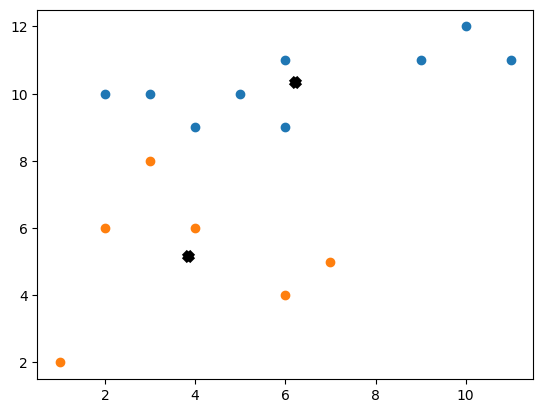

In [74]:
#visulaize the clusters

import matplotlib.pyplot as plt

#print the clusters, their centroids and the points in each cluster
def print_clusters(clusters):
    for cluster in clusters:
        print("Cluster", cluster)
        print("Centroid", np.array(clusters[cluster]).mean(axis=0).round(3))
        print("Points", clusters[cluster])
        print()

def visualize(clusters):
    for cluster in clusters:
        points = np.array(clusters[cluster])
        plt.scatter(points[:, 0], points[:, 1])
        #plot centroids
        centroid = np.array(clusters[cluster]).mean(axis=0)
        plt.scatter(centroid[0], centroid[1], marker="x", color="black", linewidths=5)
    plt.show()

print_clusters(clusters)


visualize(clusters)




### For k = 4

Cluster 0
Centroid [3.   9.25]
Points [array([ 2, 10]), array([4, 9]), array([ 3, 10]), array([3, 8])]

Cluster 1
Centroid 

[4.  4.6]
Points [array([2, 6]), array([6, 4]), array([1, 2]), array([7, 5]), array([4, 6])]

Cluster 2
Centroid [10.    11.333]
Points [array([11, 11]), array([10, 12]), array([ 9, 11])]

Cluster 3
Centroid [ 5.667 10.   ]
Points [array([6, 9]), array([ 5, 10]), array([ 6, 11])]



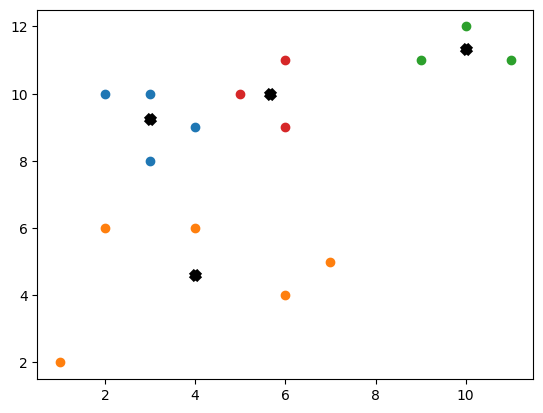

In [75]:
clusters = k_means(dataset, 4)
print_clusters(clusters)
visualize(clusters)